**1. Import important Libraries**


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


**2. Data Loading:**
   Import the dataset using Pandas.

In [5]:
df=pd.read_csv('IN_youtube_trending_data.csv')

**3. First 5 Rows for Dataset**

In [6]:
df.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


**4. Information about data and describe the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251277 entries, 0 to 251276
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           251277 non-null  object
 1   title              251277 non-null  object
 2   publishedAt        251277 non-null  object
 3   channelId          251277 non-null  object
 4   channelTitle       251276 non-null  object
 5   categoryId         251277 non-null  int64 
 6   trending_date      251277 non-null  object
 7   tags               251277 non-null  object
 8   view_count         251277 non-null  int64 
 9   likes              251277 non-null  int64 
 10  dislikes           251277 non-null  int64 
 11  comment_count      251277 non-null  int64 
 12  thumbnail_link     251277 non-null  object
 13  comments_disabled  251277 non-null  bool  
 14  ratings_disabled   251277 non-null  bool  
 15  description        231822 non-null  object
dtypes: bool(2), int64(5)

In [8]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,251277.000000,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05
mean,20.861448,2.793858e+06,1.389707e+05,2.333248e+03,8.246164e+03
std,6.040176,6.979626e+06,3.941973e+05,7.199925e+04,7.023638e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,3.779310e+05,1.204900e+04,0.000000e+00,3.420000e+02
50%,24.000000,9.474340e+05,3.699100e+04,0.000000e+00,1.123000e+03
75%,24.000000,2.420593e+06,1.161690e+05,7.180000e+02,3.951000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


**5. Data Cleaning :**

1. Handle missing values and duplicates.

2. Convert publish_time and trending_date to datetime objects.

3. Map category_id to category names using Dictinory

In [9]:
df.isnull().sum()


video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          19455
dtype: int64

In [10]:
df['description'] = df['description'].fillna('No description provided')
df['channelTitle']=df['channelTitle'].fillna('No channel title provided')

In [11]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'],utc=True)
df['trending_date'] = pd.to_datetime(df['trending_date'],utc=True)

In [12]:
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}


In [13]:
df['category_name'] = df['categoryId'].map(category_mapping)
df['category_name'] = df['category_name'].fillna('Unknown')

**6. Feature Engineering:**

1. Calculate the number of days a video remained trending.

2. Extract features like title length, number of tags, and presence of capital words

In [14]:
trending_days = df.groupby('video_id')['trending_date'].nunique().reset_index()
trending_days.rename(columns={'trending_date': 'trending_days'}, inplace=True)

In [15]:
df = df.merge(trending_days, on='video_id', how='left')


In [16]:
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['num_tags'] = df['tags'].apply(lambda x: 0 if pd.isna(x) else len(x.split('|')))


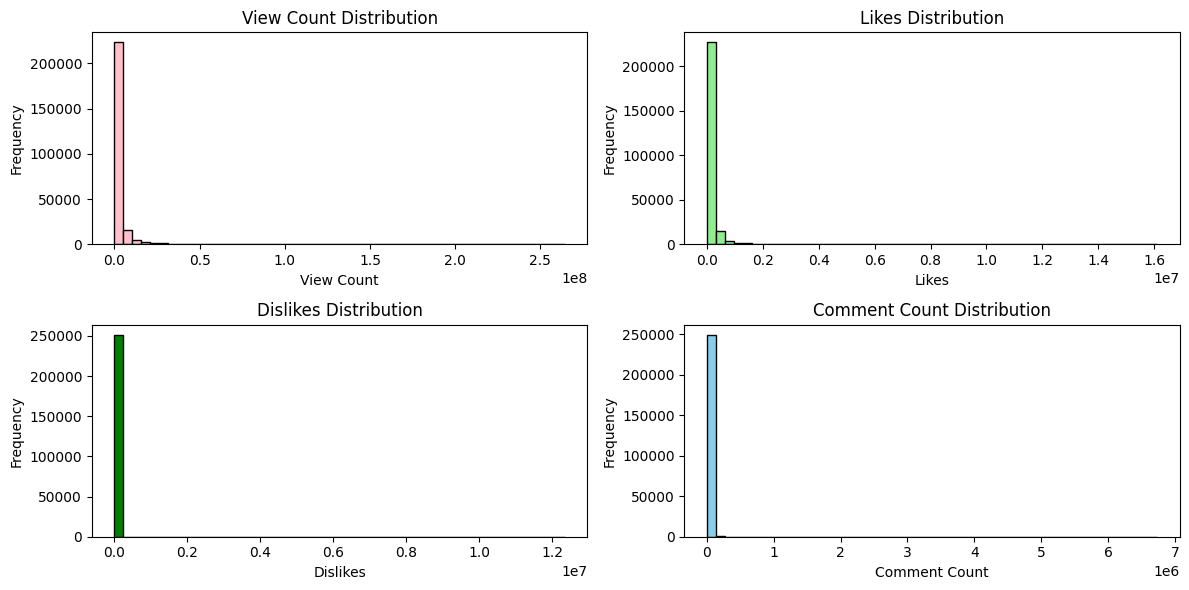

In [17]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['view_count'], bins=50, color='pink', edgecolor='black')
plt.xlabel("View Count")
plt.ylabel("Frequency")
plt.title("View Count Distribution")

plt.subplot(2, 2, 2)
plt.hist(df['likes'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.title("Likes Distribution")


plt.subplot(2, 2, 3)
plt.hist(df['dislikes'], bins=50, color='green', edgecolor='black')
plt.xlabel("Dislikes")
plt.ylabel("Frequency")
plt.title("Dislikes Distribution")

plt.subplot(2, 2, 4)
plt.hist(df['comment_count'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Comment Count")
plt.ylabel("Frequency")
plt.title("Comment Count Distribution")

plt.tight_layout()
plt.savefig("Views_count,Likes,Dislikes,Comment_count Distribution.jpg",dpi=300, bbox_inches='tight')   
plt.show()



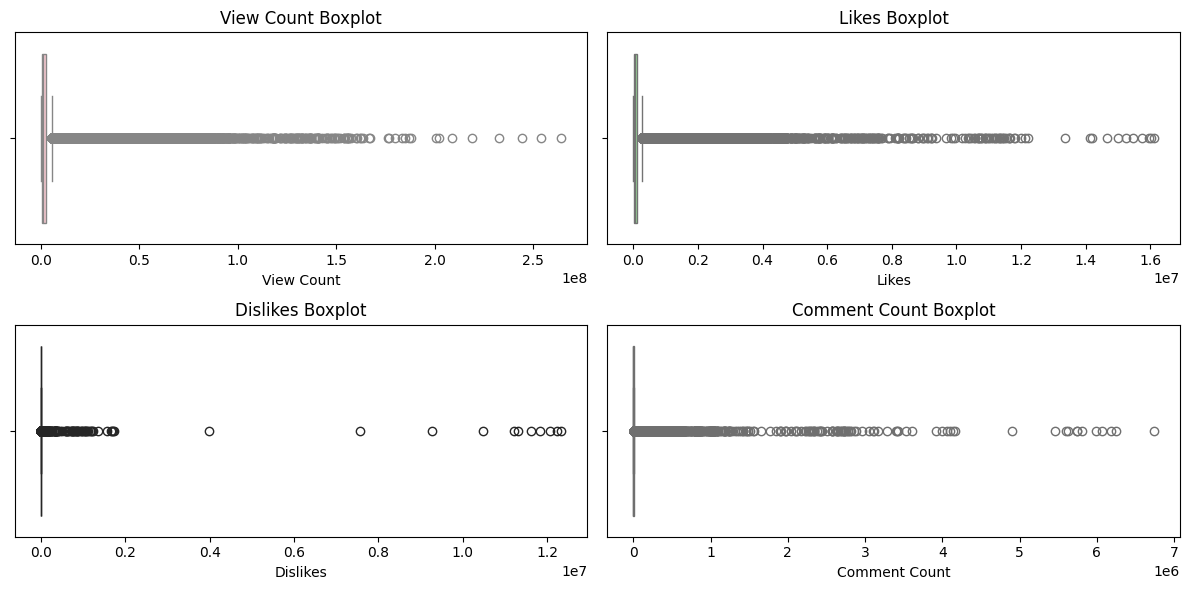

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='view_count', color='pink')
plt.xlabel("View Count")
plt.title("View Count Boxplot")

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='likes', color='lightgreen')
plt.xlabel("Likes")
plt.title("Likes Boxplot")


plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='dislikes', color='green')
plt.xlabel("Dislikes")
plt.title("Dislikes Boxplot")

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='comment_count', color='skyblue')
plt.xlabel("Comment Count")
plt.title("Comment Count Boxplot")

plt.tight_layout()
plt.savefig("Views_count,Likes,Dislikes,Comment_count Boxplot.jpg",dpi=300, bbox_inches='tight')
plt.show()




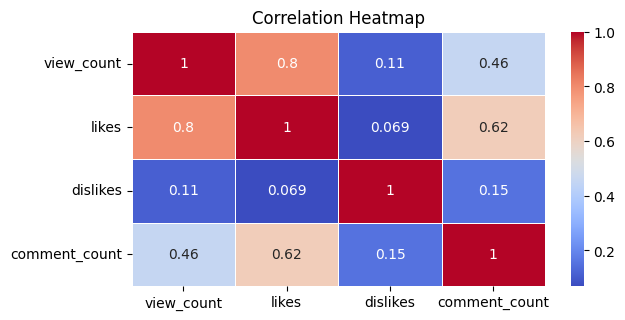

In [19]:

plt.figure(figsize=(12, 6))
cols = ['view_count', 'likes', 'dislikes', 'comment_count']
# Create a correlation matrix
corr_matrix = df[cols].corr()
plt.subplot(2, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("Correlation Heatmap.jpg",dpi=300, bbox_inches='tight')
plt.show()


**7. Category Analysis :**

1. Identify categories with the most trending videos.

2. Calculate average views per category.

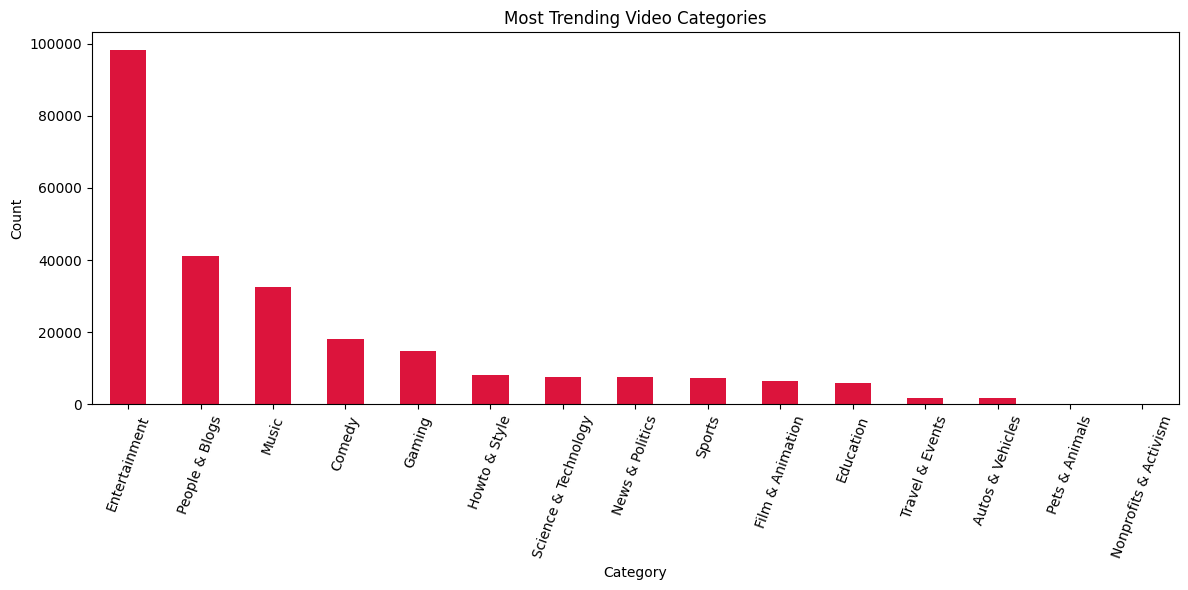

In [20]:
plt.figure(figsize=(12,6))
df['category_name'].value_counts().plot(kind='bar',color='crimson')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Most Trending Video Categories")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("Most Trending Video Categories.jpg",dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x400 with 0 Axes>

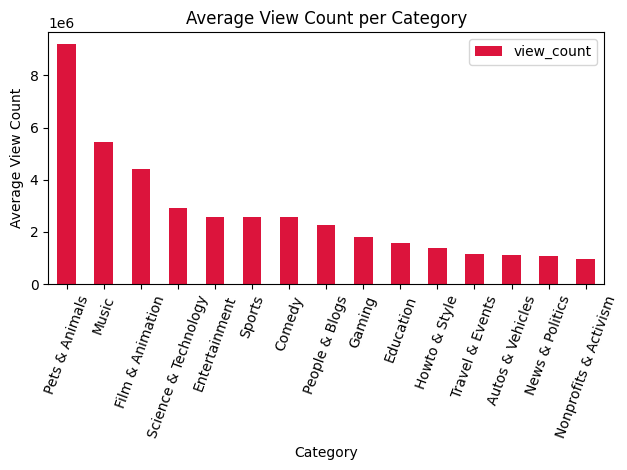

In [21]:
avg_views_per_category = df.groupby('category_name')['view_count'].mean().sort_values(ascending=False).reset_index().head(15)

plt.figure(figsize=(10,4))
avg_views_per_category.plot(kind='bar', x='category_name', y='view_count', color='crimson')
plt.xlabel('Category')
plt.ylabel('Average View Count')
plt.title("Average View Count per Category")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("avg_view_counts_per_category.jpg",dpi=300, bbox_inches='tight')
plt.show()

**3. Channel Analysis:**

1. Determine which channels have the most trending videos.

2. Identify top channels by total views.

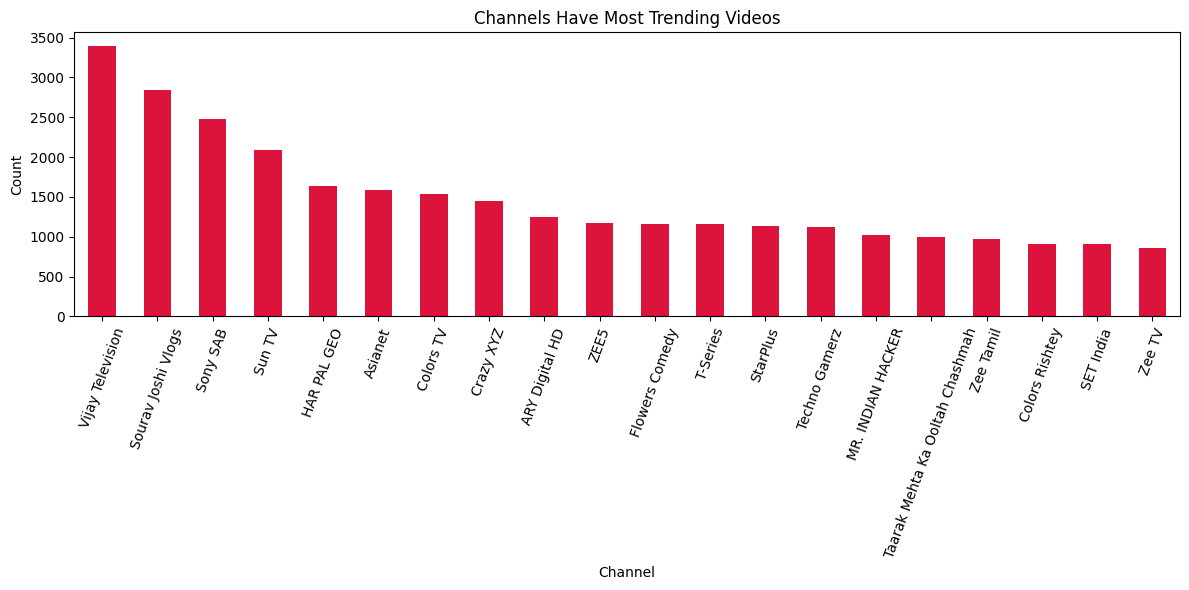

In [22]:
top_channels=df['channelTitle'].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
top_channels.plot(kind='bar', color='crimson')
plt.xlabel('Channel')
plt.ylabel('Count') 
plt.title("Channels Have Most Trending Videos")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("Channels Have Most Trending Videos.jpg",dpi=300, bbox_inches='tight')
plt.show()

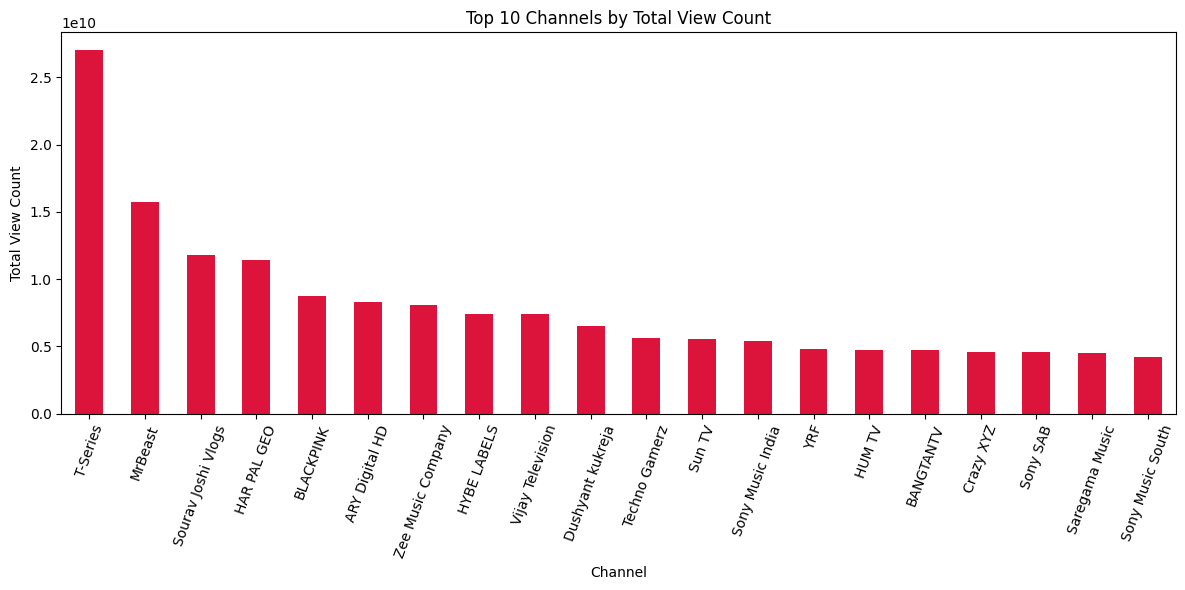

In [23]:
top_chennels_by_total_views=df.groupby('channelTitle')['view_count'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
top_chennels_by_total_views.plot(kind='bar', color='crimson')
plt.xlabel('Channel')
plt.ylabel('Total View Count') 
plt.title("Top 10 Channels by Total View Count")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("Top 10 Channels by Total View Count.jpg",dpi=300, bbox_inches='tight')
plt.show()

**4. Temporal Analysis**

1. Examine trends over time, such as days of the week or months with the most trending videos.

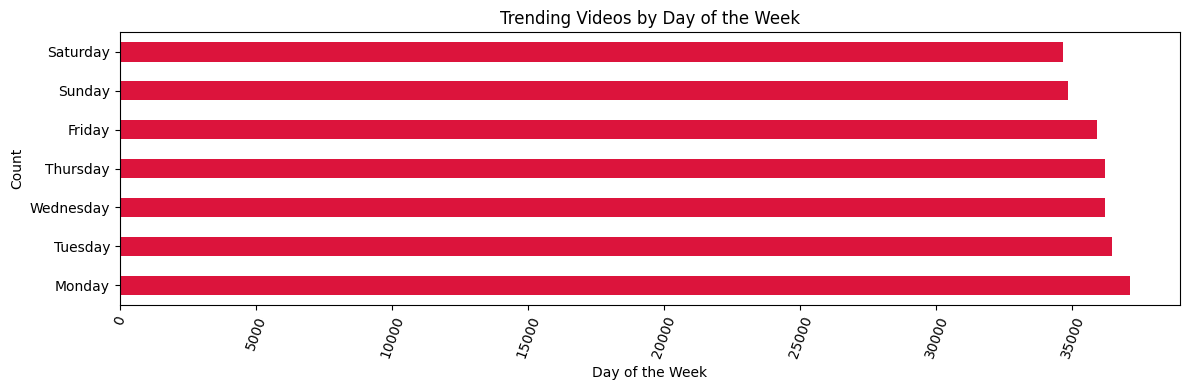

In [28]:
df['day_of_week'] = df['trending_date'].dt.day_name()
df['month'] = df['trending_date'].dt.month_name()
plt.figure(figsize=(12,4))
df['day_of_week'].value_counts().plot(kind='barh', color='crimson',linewidth=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title("Trending Videos by Day of the Week")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("Trending Videos by Days.jpg",dpi=300, bbox_inches='tight')
plt.show()



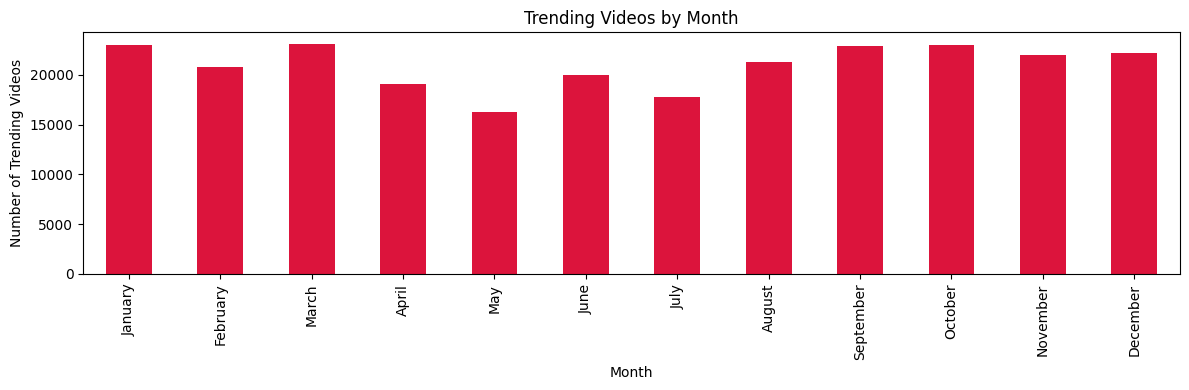

In [30]:
plt.figure(figsize=(12,4))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December']

df['month'].value_counts().loc[month_order].dropna().plot(kind='bar', color='crimson')

plt.title('Trending Videos by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trending Videos')
plt.tight_layout()
plt.savefig("Trending Videos by Month.jpg",dpi=300, bbox_inches='tight')
plt.show()


In [26]:
df.to_csv('cleaned_youtube_data.csv', index=False)
